## Prediction from single image

In [6]:
color_image='1.jpeg'

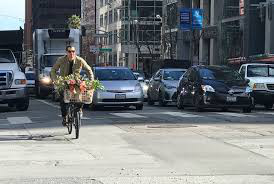

In [7]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open(color_image)
display(pil_im)

In [8]:
from imageai.Prediction import ImagePrediction
import os

execution_path = os.getcwd()

prediction = ImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "models/resnet50_weights_tf_dim_ordering_tf_kernels.h5"))
prediction.loadModel()

predictions, probabilities = prediction.predictImage(os.path.join(execution_path, color_image), result_count=5)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)

jinrikisha  :  62.425047159194946
streetcar  :  5.459105223417282
trolleybus  :  4.816967993974686
cab  :  2.59347390383482
police_van  :  2.3194214329123497


## Multiple object detections together

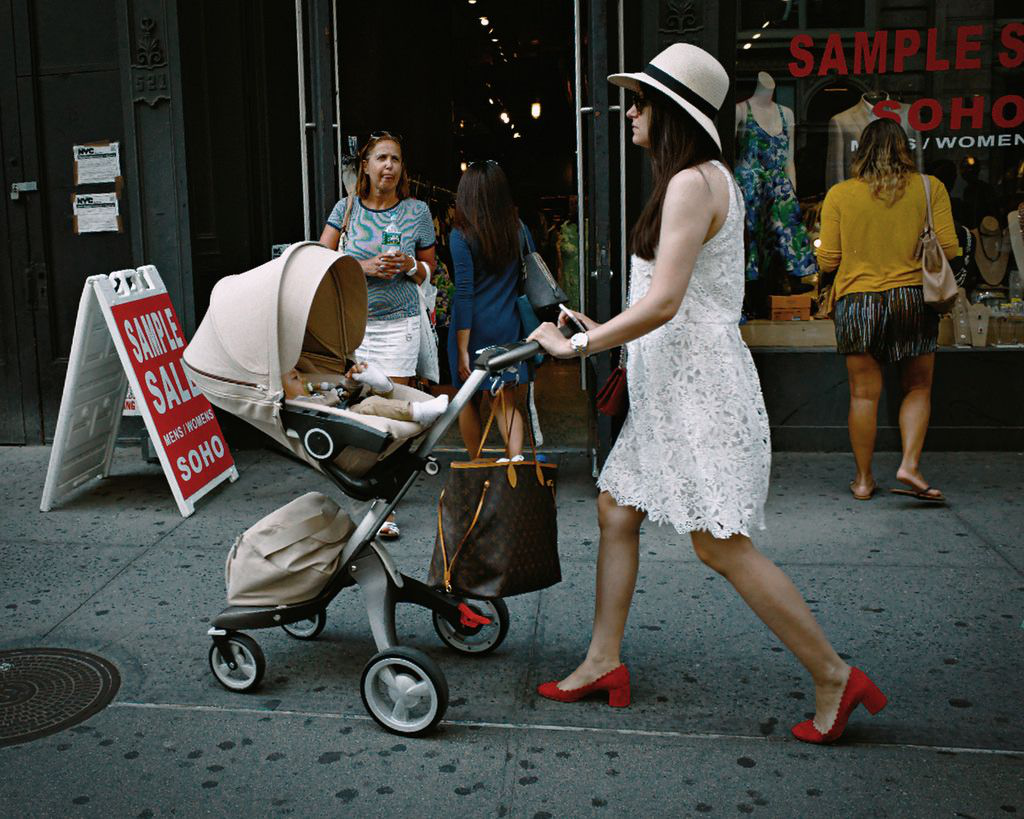

In [12]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open('1.jpg')
display(pil_im)

In [10]:
from imageai.Prediction import ImagePrediction
import os

execution_path = os.getcwd()

multiple_prediction = ImagePrediction()
multiple_prediction.setModelTypeAsResNet()
multiple_prediction.setModelPath(os.path.join(execution_path, "models/resnet50_weights_tf_dim_ordering_tf_kernels.h5"))
multiple_prediction.loadModel()

all_images_array = []

all_files = os.listdir(execution_path)
for each_file in all_files:
    if(each_file.endswith(".jpeg") or each_file.endswith(".jpg")):
        all_images_array.append(each_file)

results_array = multiple_prediction.predictMultipleImages(all_images_array, result_count_per_image=5)

for each_result in results_array:
    predictions, percentage_probabilities = each_result["predictions"], each_result["percentage_probabilities"]
    for index in range(len(predictions)):
        print(predictions[index] , " : " , percentage_probabilities[index])
    print("-----------------------")

jinrikisha  :  62.425047159194946
streetcar  :  5.459105223417282
trolleybus  :  4.816967993974686
cab  :  2.59347390383482
police_van  :  2.3194214329123497
-----------------------
jinrikisha  :  19.044682383537292
barrow  :  17.33454316854477
moped  :  13.20207267999649
tricycle  :  3.3433590084314346
vacuum  :  2.8186842799186707
-----------------------


## Predictions Possible on Array and Stream

In [14]:
# predictions, probabilities = prediction.predictImage(image_array, result_count=5 , input_type="array" ) # For numpy array input type
# predictions, probabilities = prediction.predictImage(image_stream, result_count=5 , input_type="stream" ) # For file stream input type

## Predictions Possible on Multithreading

In [15]:
# from imageai.Prediction import ImagePrediction
# import os
# import threading

# execution_path = os.getcwd()

# prediction = ImagePrediction()
# prediction.setModelTypeAsResNet()
# prediction.setModelPath( os.path.join(execution_path, "resnet50_weights_tf_dim_ordering_tf_kernels.h5"))

# picturesfolder = os.environ["USERPROFILE"] + "\\Pictures\\"
# allfiles = os.listdir(picturesfolder)

# class PredictionThread(threading.Thread):
#     def __init__(self):
#         threading.Thread.__init__(self)
#     def run(self):
#         prediction.loadModel()
#         for eachPicture in allfiles:
#             if eachPicture.endswith(".png") or eachPicture.endswith(".jpg"):
#                 predictions, percentage_probabilities = prediction.predictImage(picturesfolder + eachPicture, result_count=1)
#                 for prediction, percentage_probability in zip(predictions, probabilities):
#                     print(prediction , " : " , percentage_probability)

# predictionThread = PredictionThread ()
# predictionThread.start()